In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet

import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd

In [4]:
%run -i financial_sector_functions.py

/home/luke/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
def return_function(df):
    if type(df)!=pd.DataFrame:
        df = pd.DataFrame(df)
    out_df = (df.shift(-1)-df)/df
    return out_df

In [6]:
data = pd.read_csv("financial_sector_clean_return_space.csv")
data.index = pd.DatetimeIndex(data.iloc[:,[0]].values.flatten())
data = data.iloc[:,1:]

sp500 = pd.read_csv('/home/luke/workspace/Sector-Analysis/data/CFRM521_final_project/SPX500.csv')
sp500.index = pd.DatetimeIndex(sp500.iloc[:,[0]].values.flatten())
sp500 = sp500.iloc[:,[1]]
sp500 = return_function(sp500)

sector_return = data.iloc[:,[0]]
x_data = pd.concat([data.iloc[:,1:],sp500],1)

sector_return,x_data = model_data(sector_return,x_data)
sector_return,sp500 = model_data(sector_return,sp500)

In [7]:
sector_beat_benchmarks = pd.DataFrame((sector_return.values > sp500.values)*1,index = sector_return.index, columns = sector_return.columns)

In [60]:
x_data.index,sector_beat_benchmarks

(DatetimeIndex(['2000-12-31', '2001-01-31', '2001-02-28', '2001-03-31',
                '2001-04-30', '2001-05-31', '2001-06-30', '2001-07-31',
                '2001-08-31', '2001-09-30',
                ...
                '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
                '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
                '2017-03-31', '2017-04-30'],
               dtype='datetime64[ns]', length=197, freq='M'),
             IYF US Equity
 2000-12-31              0
 2001-01-31              1
 2001-02-28              1
 2001-03-31              0
 2001-04-30              1
 2001-05-31              1
 2001-06-30              1
 2001-07-31              1
 2001-08-31              1
 2001-09-30              0
 2001-10-31              1
 2001-11-30              1
 2001-12-31              0
 2002-01-31              1
 2002-02-28              1
 2002-03-31              1
 2002-04-30              1
 2002-05-31              1
 2002-06-30              1
 

In [45]:
x = x_data
y = sector_beat_benchmarks


In [46]:
def elastic_net_function(alpha_value,l1_value):
    regr = ElasticNet(alpha =alpha_value,l1_ratio=l1_value,fit_intercept=True)
    regr.fit(x, y)

    regr.coef_
    elastic_result = [1.0 if prob>0.5 else 0.0 for prob in regr.predict(x)]
    elastic_result = pd.DataFrame(elastic_result,index = y.index)
    accuracy_value = evaluate_metric(y,elastic_result,'acf')
    return accuracy_value

In [62]:
result_df = pd.DataFrame()
for alpha in np.linspace(0.0001,0.10,10):
    for l1 in np.linspace(0.001,0.5,10):
        acf_value = elastic_net_function(alpha,l1)
        result_df.loc["Alpha: "+str(round(alpha,3)),str(round(l1,3))] = acf_value

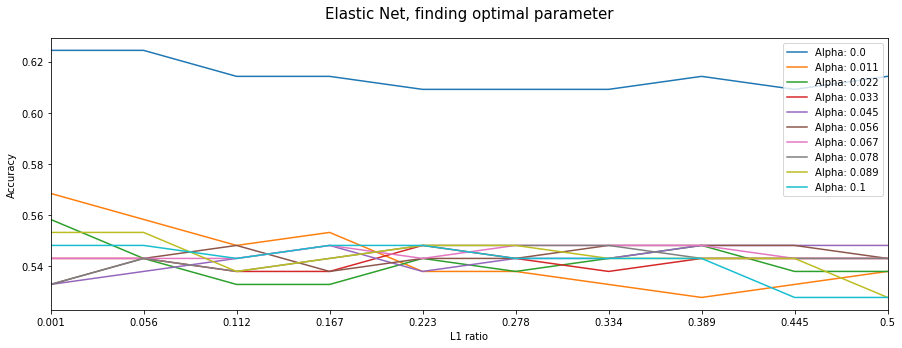

In [67]:
result_df.T.plot(figsize = (15,5))
plt.xlabel("L1 ratio")
plt.ylabel("Accuracy")
ttl = plt.title("Elastic Net, finding optimal parameter",fontsize = 15)
ttl.set_position([.5, 1.05])
plt.savefig("Elastic_regression_cant_beat_linear_reg.png")
plt.show()

In [58]:
elastic_net_function(0.00,0.0)

/home/luke/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until


0.64467005076142136

In [ ]:
nunmber_of_years_lookback = 5
month_forecast = 3
lambda_value = 3.5


logistic_result_dict = {}
coef_all_df = pd.DataFrame()
accuracy_dict = {}
y_prediction_dict ={}
prob_dict ={}
number_of_runs = 0.0


elastic_result = [1.0 if prob>0.5 else 0.0 for prob in regr.predict(x)]
elastic_result = pd.DataFrame(elastic_result,index = y.index)
accuracy_value = evaluate_metric(y,elastic_result,'acf')



for dt_index in x.index[x.index>=x.index.min()+pd.DateOffset(years = nunmber_of_years_lookback)][:-(month_forecast-1)]:
    begin_index,end_index = dt_index+pd.DateOffset(years = -nunmber_of_years_lookback)+MonthEnd(0),dt_index+MonthEnd(-1)
    selection = (x.index>=begin_index) & (x.index <= end_index)
    spliced_x = x[selection]
    spliced_y = y[selection]

    assert(len(spliced_x.index)==nunmber_of_years_lookback*12)
    regr = ElasticNet(alpha =alpha_value,l1_ratio=l1_value,fit_intercept=True)
    regr.fit(x, y)

    
    test_begin_index,test_end_index = dt_index+pd.DateOffset(months=+1)+MonthEnd(-1),dt_index+pd.DateOffset(months=+month_forecast)+MonthEnd(-1)
    test_selection = (x.index>=test_begin_index) & (x.index<=test_end_index)
    test_x = x[test_selection]
    test_y = y[test_selection]
    assert(len(test_y)==month_forecast)
    y_prediction = pd.DataFrame(logistic.predict(test_x),index = test_y.index,columns = test_y.columns)
    prb_values = [prob_list[1] for prob_list in logistic.predict_proba(test_x)]
    prob_dict[str(dt_index.date())]=pd.DataFrame(prb_values, index = test_y.index)
    y_prediction_dict[dt_index] = y_prediction
    accuracy_df = ((y_prediction-test_y)==0)*1
    accuracy_dict[str(dt_index.date())] = accuracy_df
    number_of_runs +=1
